## Librerías 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np   #necesaria?


from src import soporte_EDA as sp_eda
from src import soporte_limpieza as sp_clean
from src import soporte_visualizacion as sp_viz
from src import soporte_paletas_colores as pal
from src import soporte_correlacion as sp_corr

## Carga

In [37]:
df_flights = pd.read_csv("files\\Customer Flight Activity.csv")
df_profile = pd.read_csv("files\\Customer Loyalty History.csv")
pd.set_option("display.max_columns", None)

## EDA: Exploración inicial. Customer Flight Activity

In [38]:
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [39]:
print(f"El número de filas que tenemos es {df_flights.shape[0]} y el número de columnas es {df_flights.shape[1]}")

El número de filas que tenemos es 405624 y el número de columnas es 10


In [40]:
df_flights.info()

#todo números

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [41]:
round (df_flights.isna().sum()/df_flights.shape[0]*100,2)

#no hay nulos 

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [42]:
df_flights.duplicated().sum()

np.int64(1864)

In [43]:
df_flights.duplicated(subset="Loyalty Number").sum()

#números de cliente duplicados. 

np.int64(388887)

In [44]:
round(df_flights.duplicated(subset="Loyalty Number").sum()/df_flights.shape[0]*100,2)

# ¿por qué el 95.87% de los Loyalty number está duplicado? Hay valores repetidos porque es un registro por cada mes de actividad.  

np.float64(95.87)

In [45]:
df_flights.describe().T

#cómo son mis variables

#por qué hay 999986.0 Loyalty Number si el total de filas es 405624. ¿Son consecutivos? ¿Faltan la mitad?

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [46]:
df_flights[df_flights.duplicated(subset="Loyalty Number", keep=False)].sort_values("Loyalty Number").head(10)

#incluir original y duplicado para ver la comparación. 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
169010,100018,2017,11,13,1,14,3374,337.0,0,0
135208,100018,2017,9,9,4,13,1651,165.0,0,0
50703,100018,2017,4,4,0,4,924,92.0,0,0
287317,100018,2018,6,0,0,0,0,0.0,0,0
152109,100018,2017,10,6,0,6,1032,103.0,0,0
213311,100018,2017,3,14,3,17,2533,253.0,438,36
371822,100018,2018,11,11,0,11,3058,305.0,0,0
388723,100018,2018,12,17,6,23,4945,494.0,0,0
185911,100018,2017,12,6,0,6,1908,190.0,0,0
338020,100018,2018,9,14,2,16,3568,356.0,0,0


In [47]:
df_flights["Loyalty Number"].value_counts(dropna=False, normalize=True)*100

Loyalty Number
678205    0.017750
499874    0.011834
411734    0.011834
255475    0.011834
528447    0.011834
            ...   
101515    0.005917
101540    0.005917
101544    0.005917
101547    0.005917
999891    0.005917
Name: proportion, Length: 16737, dtype: float64

In [48]:
df_flights["Loyalty Number"].unique()

array([100018, 100102, 100140, ..., 999731, 999788, 999891])

ESTADÍSTICA DESCRIPTIVA 

El mínimo de Loyalty Number es 100018
El máximo de Loyalty Number es 999986
La media de Loyalty Number es 550037.8730844329
La mediana de Loyalty Number es 550834.0
--------------------
DESCRIBE ENTERO:
 count    405624.000000
mean     550037.873084
std      258935.286969
min      100018.000000
25%      326961.000000
50%      550834.000000
75%      772194.000000
max      999986.000000
Name: Loyalty Number, dtype: float64 

--------------------


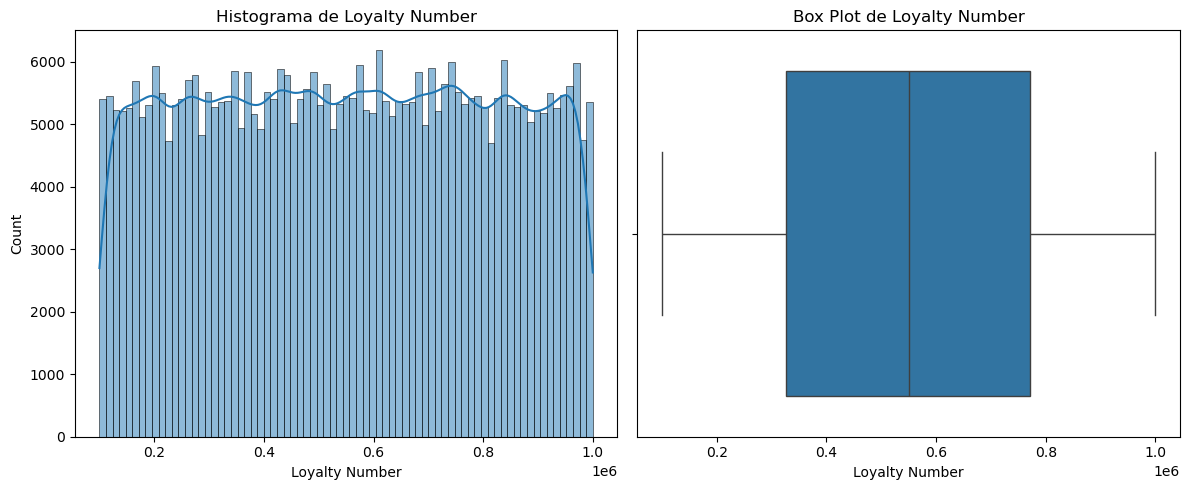

In [49]:
sp_eda.exploracion_num(df_flights, "Loyalty Number" )

## EDA: Exploración inicial. Customer Loyalty History

In [50]:
df_profile.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [51]:
print(f"El número de filas que tenemos es {df_profile.shape[0]} y el número de columnas es {df_profile.shape[1]}")

El número de filas que tenemos es 16737 y el número de columnas es 16


In [52]:
df_profile.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [53]:
round (df_profile.isna().sum()/df_profile.shape[0]*100,2)

#nulos en Cancellation porque los cientes siguen activos


Loyalty Number         0.00
Country                0.00
Province               0.00
City                   0.00
Postal Code            0.00
Gender                 0.00
Education              0.00
Salary                25.32
Marital Status         0.00
Loyalty Card           0.00
CLV                    0.00
Enrollment Type        0.00
Enrollment Year        0.00
Enrollment Month       0.00
Cancellation Year     87.65
Cancellation Month    87.65
dtype: float64

In [54]:
df_profile.duplicated().sum()
#no hay duplicados

np.int64(0)

In [55]:
df_profile.describe().T


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [56]:
df_profile["Loyalty Number"].value_counts(dropna=False, normalize=True)*100

Loyalty Number
652627    0.005975
954587    0.005975
909547    0.005975
464394    0.005975
154981    0.005975
            ...   
530508    0.005975
193662    0.005975
927943    0.005975
188893    0.005975
852392    0.005975
Name: proportion, Length: 16737, dtype: float64

In [57]:
df_profile["Loyalty Number"].unique()

array([480934, 549612, 429460, ..., 776187, 906428, 652627])

ESTADÍSTICA DESCRIPTIVA 

El mínimo de Loyalty Number es 100018
El máximo de Loyalty Number es 999986
La media de Loyalty Number es 549735.8804445241
La mediana de Loyalty Number es 550434.0
--------------------
DESCRIBE ENTERO:
 count     16737.000000
mean     549735.880445
std      258912.132453
min      100018.000000
25%      326603.000000
50%      550434.000000
75%      772019.000000
max      999986.000000
Name: Loyalty Number, dtype: float64 

--------------------


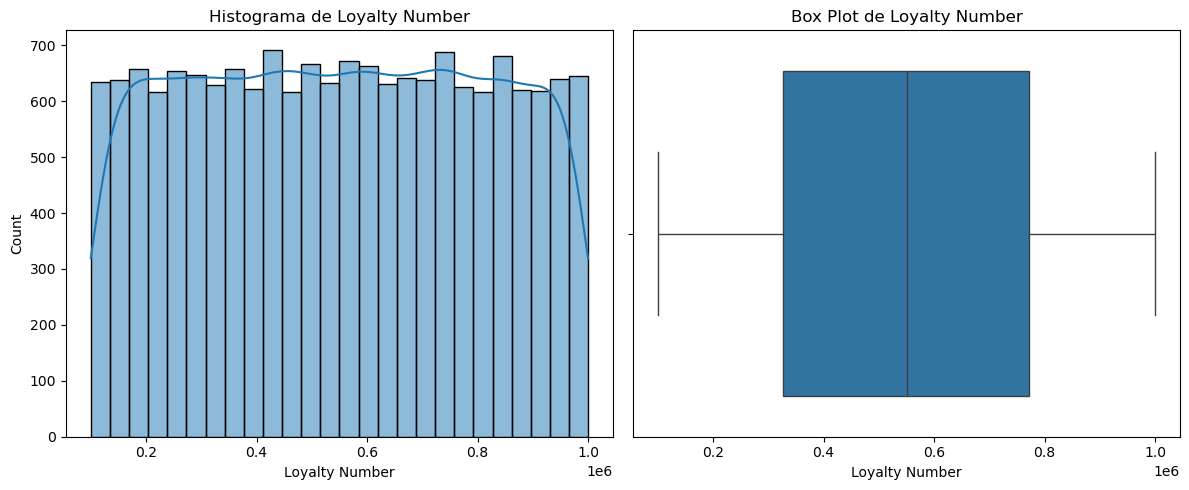

In [58]:
sp_eda.exploracion_num(df_profile, "Loyalty Number" )

## Unión dataframes

In [59]:
df_merged = pd.merge(
    df_profile, # DataFrame Izquierdo (Mantenemos todos los clientes de aquí)
    df_flights, # DataFrame Derecho (Añadimos los vuelos correspondientes)
    on='Loyalty Number', #Columna común
    how='left' 
)


## EDA: Exploración inicial merged

In [60]:
df_merged.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [61]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

In [62]:
print(f"El número de filas que tenemos es {df_merged.shape[0]} y el número de columnas es {df_merged.shape[1]}")

#se mantiene la cantidad de filas de registros de vuelo, se han sumado las columnas. Mergeo comprobado 

El número de filas que tenemos es 405624 y el número de columnas es 25


In [63]:
df_merged.isna().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

In [64]:
round(df_merged.isna().sum()/df_merged.shape[0]*100,2)

Loyalty Number                  0.00
Country                         0.00
Province                        0.00
City                            0.00
Postal Code                     0.00
Gender                          0.00
Education                       0.00
Salary                         25.31
Marital Status                  0.00
Loyalty Card                    0.00
CLV                             0.00
Enrollment Type                 0.00
Enrollment Year                 0.00
Enrollment Month                0.00
Cancellation Year              87.66
Cancellation Month             87.66
Year                            0.00
Month                           0.00
Flights Booked                  0.00
Flights with Companions         0.00
Total Flights                   0.00
Distance                        0.00
Points Accumulated              0.00
Points Redeemed                 0.00
Dollar Cost Points Redeemed     0.00
dtype: float64

In [65]:
df_merged.duplicated().sum()

np.int64(1864)

In [66]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Cancellation Year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00


In [67]:
df_merged.describe(include="O").T

,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


## EDA: Exploración en detalle de los insights obtenidos en la fase anterior

In [106]:
#next steps

## Limpieza nulos

### Nulos "Salary"

In [68]:
#imputación segmentada nulos salario

In [69]:
#MODA salario en función de educación, género y ciudad:

segment_columns = ["Education", "Gender", "City"]

# Calculamos la moda condicional: buscamos el salario más frecuente (mode) dentro de cada segmento definido por las tres columnas. 
# Usamos [0] para seleccionar el primer valor en caso de que haya varias modas (empate).
imputation_mode = df_merged.groupby(segment_columns)["Salary"].transform(
    lambda x: x.mode()[0] if not x.mode().empty else None
)

# Imprimimos un mensaje de confirmación
print(imputation_mode)

0         67445.0
1         67445.0
2         67445.0
3         67445.0
4         67445.0
           ...   
405619    69098.0
405620    69098.0
405621    69098.0
405622    69098.0
405623    69098.0
Name: Salary, Length: 405624, dtype: float64


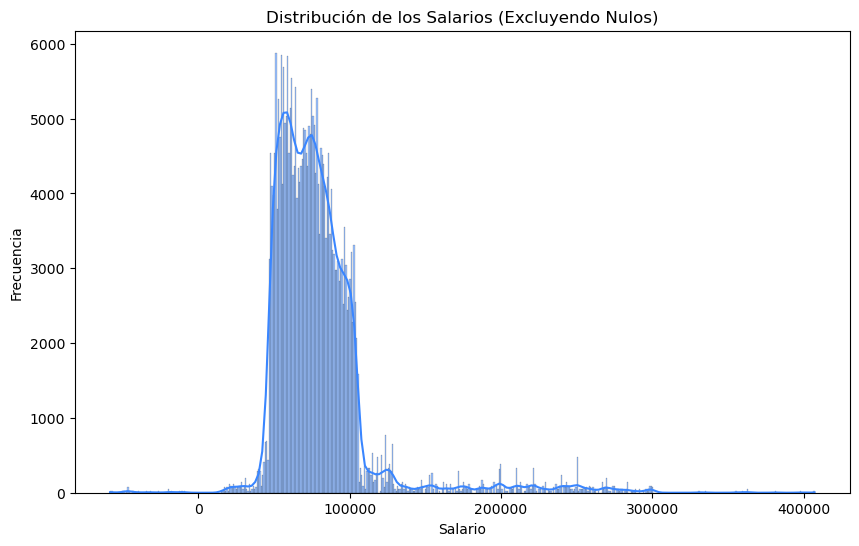

In [70]:

plt.figure(figsize=(10, 6))

sns.histplot(
    data=df_merged.dropna(subset=["Salary"]), # Solo filas donde Salary NO es nulo
    x="Salary", 
    kde=True,
    color= pal.ocean_blue_serenity["Azul_Oceano"]
)
plt.title("Distribución de los Salarios (Excluyendo Nulos)")
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.show()

C:\Users\micae\AppData\Local\Temp\ipykernel_15908\1725462202.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


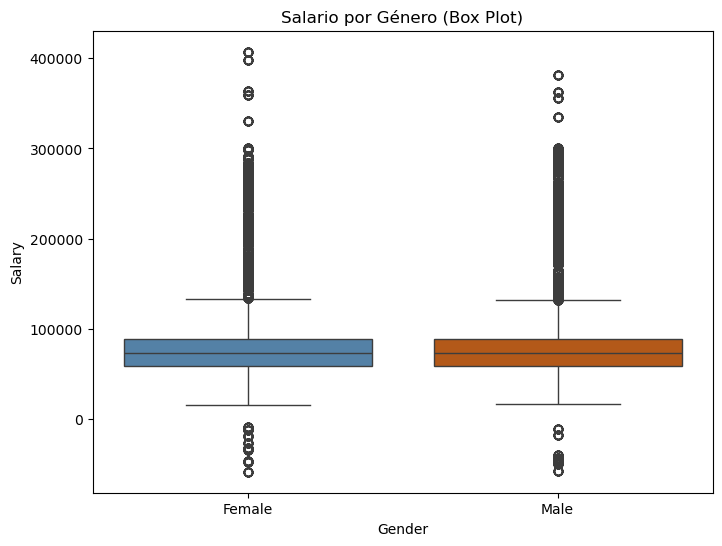

In [71]:

#Relación entre Salary y Gender 
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_merged,
    x='Gender', 
    y='Salary',
    palette= [pal.crimson_coast["Azul_Pizarra"], pal.crimson_coast["Naranja_Quemado"]]
)
plt.title('Salario por Género (Box Plot)')
plt.show()


C:\Users\micae\AppData\Local\Temp\ipykernel_15908\4114753851.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


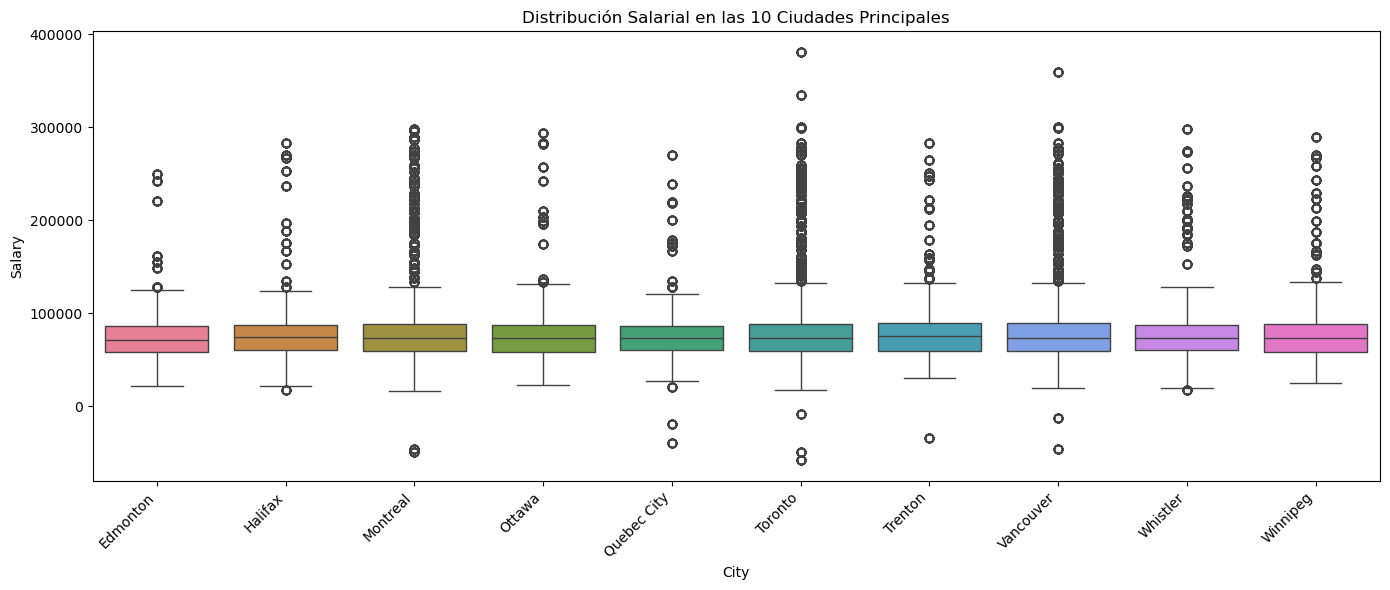

In [72]:
#Relación entre Salary y City (Top 10 Cities)
# Pista: Como hay muchas ciudades, solo visualizamos las 10 más frecuentes.
top_cities = df_merged['City'].value_counts().nlargest(10).index
df_top_cities = df_merged[df_merged['City'].isin(top_cities)]

plt.figure(figsize=(14, 6))
sns.boxplot(
    data=df_top_cities.sort_values('City'),
    x='City', 
    y='Salary',
    palette=sns.color_palette("husl", n_colors=10)
)
plt.title('Distribución Salarial en las 10 Ciudades Principales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\micae\AppData\Local\Temp\ipykernel_15908\900562151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


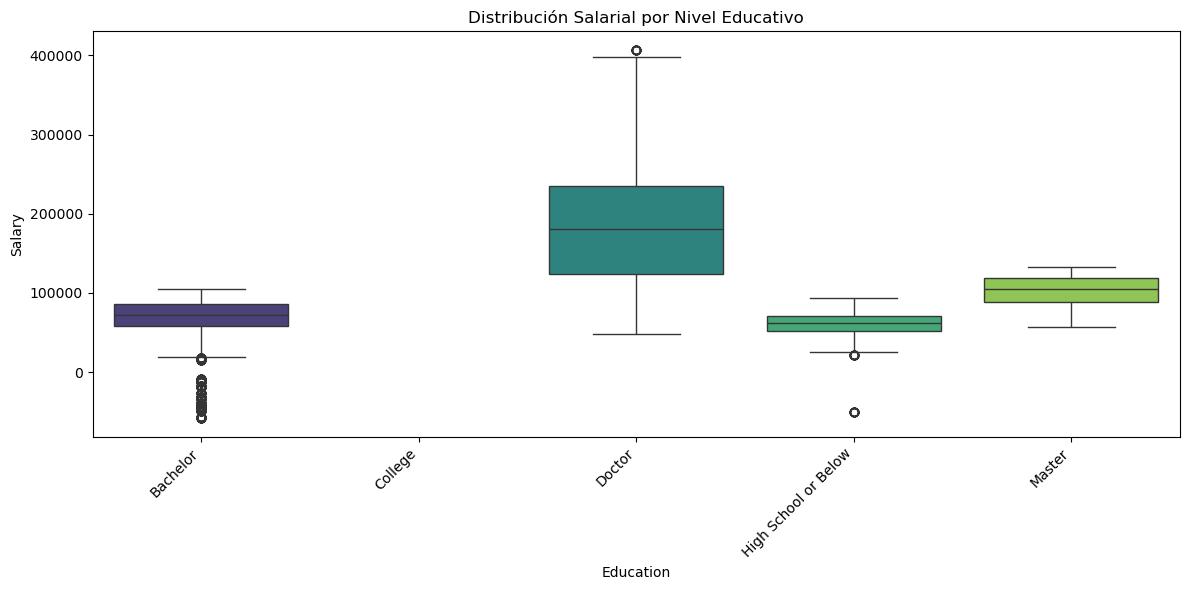

In [73]:
#Relación entre Salary y Education
plt.figure(figsize=(12, 6))
# Usamos una paleta diferente para las múltiples categorías de Education
sns.boxplot(
    data=df_merged.sort_values('Education'), # Opcional: ordenar para mejor visualización
    x='Education', 
    y='Salary',
    palette=sns.color_palette("viridis", n_colors=len(df_merged['Education'].unique()))
)
plt.title('Distribución Salarial por Nivel Educativo')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X para mejor lectura
plt.tight_layout()
plt.show()


#Falta "College" en "Education"

In [87]:

# 1. Calcular el salario medio (mean) para cada nivel educativo
df_ordenado = df_merged.groupby('Education')['Salary'].mean().reset_index()

# 2. Ordenar los niveles de Education por el salario medio (ascendente)
df_ordenado = df_ordenado.sort_values(by='Salary')

# 3. Extraer el orden para el gráfico (Eje X)
orden_educacion = df_ordenado['Education'].tolist()

C:\Users\micae\AppData\Local\Temp\ipykernel_15908\1819989366.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


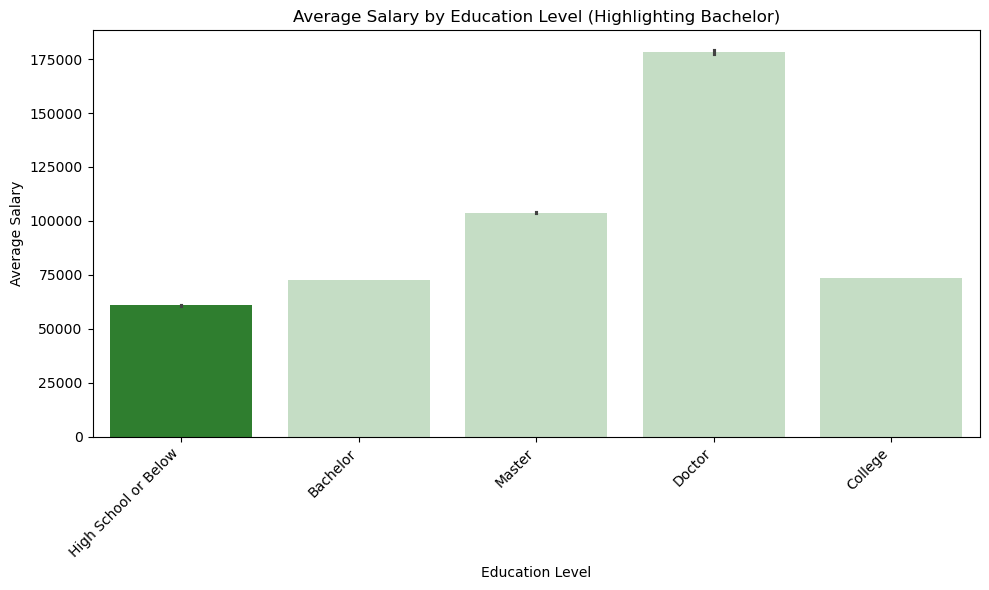

In [85]:
plt.figure(figsize=(10, 6))


colores_para_grafico = [pal.earthy_green_tones["Verde_Bosque"] if nivel == 'High School or Below' else pal.earthy_green_tones["Verde_Menta_Suave"] for nivel in orden_educacion]

# Creamos el Bar Plot
sns.barplot(
    data=df_merged,
    x='Education',
    y='Salary',
    order=orden_educacion,     # Usamos el orden calculado (salario ascendente)
    estimator=np.mean,         # Indicamos explícitamente que queremos la media (Mean)
    palette=colores_para_grafico # Aplicamos la paleta que destaca "Bachelor"
)

plt.title('Average Salary by Education Level (Highlighting Bachelor)')
plt.ylabel('Average Salary')
plt.xlabel('Education Level')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura
plt.tight_layout()
plt.show()

C:\Users\micae\AppData\Local\Temp\ipykernel_15908\1619265700.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


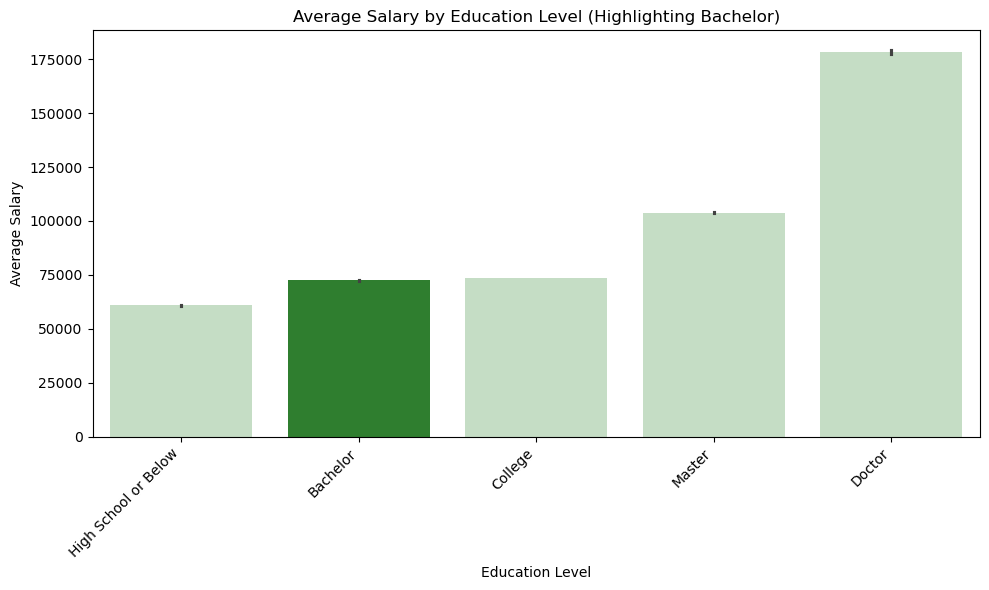

In [88]:
plt.figure(figsize=(10, 6))

colores_para_grafico = [pal.earthy_green_tones["Verde_Bosque"] if nivel == 'Bachelor' else pal.earthy_green_tones["Verde_Menta_Suave"] for nivel in orden_educacion]

# Creamos el Bar Plot
sns.barplot(
    data=df_merged,
    x='Education',
    y='Salary',
    order=orden_educacion,     # Usamos el orden calculado (salario ascendente)
    estimator=np.mean,         # Indicamos explícitamente que queremos la media (Mean)
    palette=colores_para_grafico # Aplicamos la paleta que destaca "Bachelor"
)

plt.title('Average Salary by Education Level (Highlighting Bachelor)')
plt.ylabel('Average Salary')
plt.xlabel('Education Level')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_merged,
    x='Education',
    y='Salary',
    palette='Set2' 
)
plt.title('Distribución Salarial y Frecuencia de Valores por Nivel Educativo')
plt.ylabel('Salario')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Imputación valores nulos de "Salary" teniendo en cuenta que el valor "College" en "Education" es nulo:

Media entre el valor superior e inferior: High School or Below y Bachelor. (College se encuentra en medio)

In [101]:
reference_levels = ['Bachelor', 'High School or Below']

mean_reference_salary = df_merged.loc[
    df_merged['Education'].isin(reference_levels), 
    'Salary'
].mean()

print(f"Media de Salarios de Referencia Calculada: {mean_reference_salary:,.2f}")

Media de Salarios de Referencia Calculada: 71,675.52


In [102]:
# Sustitución del Salario: Utilizamos .loc[] para filtrar donde 'Education' es 'College'.
# Asignamos la media calculada (mean_reference_salary) a la columna 'Salary' en esas filas.
df_merged.loc[
    df_merged['Education'] == 'College', 
    'Salary'
] = mean_reference_salary

print("Sustitución de Salarios para la categoría 'College' completada. La etiqueta 'College' se ha mantenido.")

Sustitución de Salarios para la categoría 'College' completada. La etiqueta 'College' se ha mantenido.


In [103]:
df_merged["Education"].isna().sum()

np.int64(0)

In [104]:
df_merged.isna().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                              0
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

C:\Users\micae\AppData\Local\Temp\ipykernel_15908\2787940451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


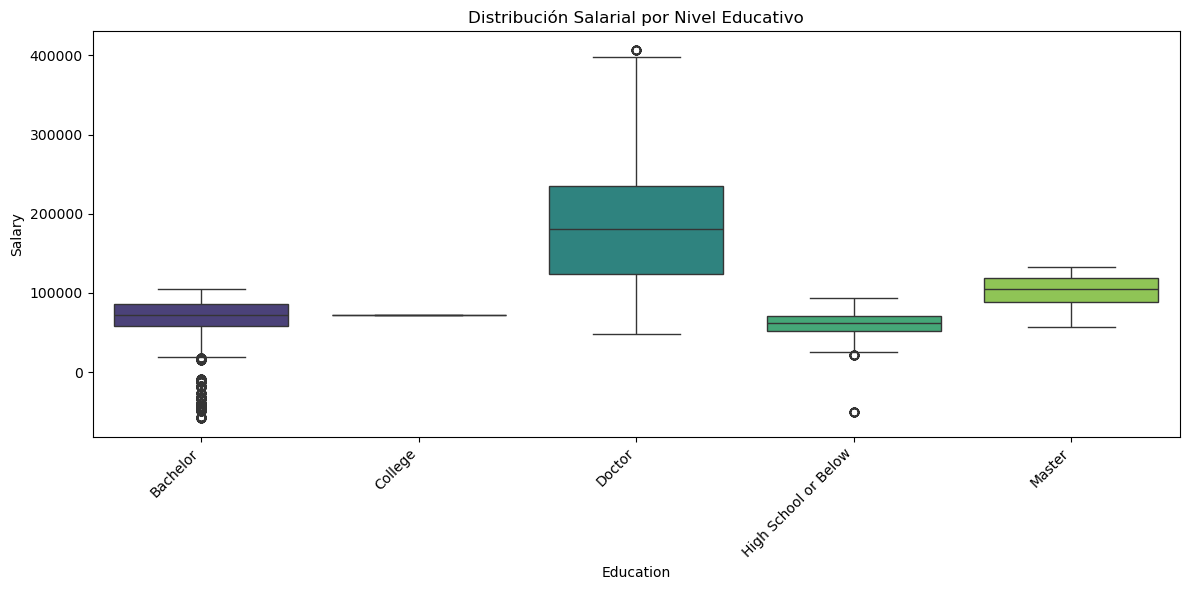

In [105]:
#Relación entre Salary y Education, con College imputado
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_merged.sort_values('Education'), 
    x='Education', 
    y='Salary',
    palette=sns.color_palette("viridis", n_colors=len(df_merged['Education'].unique()))
)
plt.title('Distribución Salarial por Nivel Educativo')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### Nulos "Cancellation Year" y "Cancellation Month"

## Guardado CSV limpio

## Visualización y estadística descriptiva: análisis insights sobre CSV limpio

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?


3. ¿Cuál es la distribución de los clientes por provincia o estado?

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad? 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [82]:
#sns.scatterplot(data=df, x= "Age", y="Fare");